In [141]:
import numpy as np

[75.05642756]
MSE: 305.7719958301902
Accuracy: 0.9253717934621969


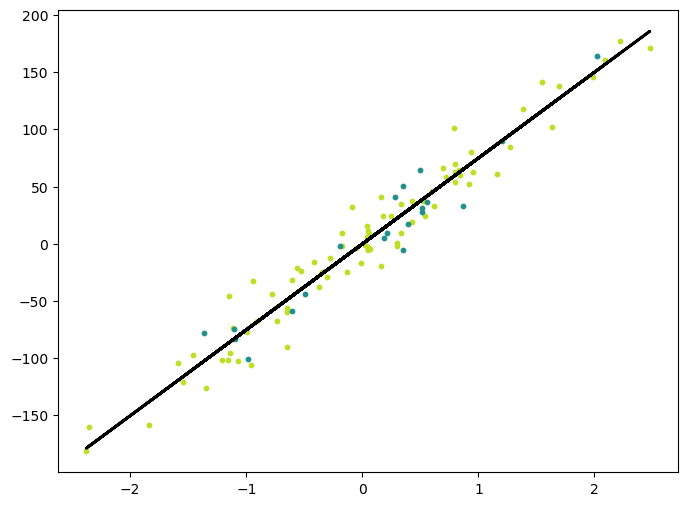

In [142]:

def r2_score(y_true, y_pred):
    corr_matrix = np.corrcoef(y_true, y_pred)
    corr = corr_matrix[0, 1]
    return corr ** 2


class LinearRegression:
    def __init__(self, learning_rate=0.001, n_iters=1000):
        self.lr = learning_rate
        self.n_iters = n_iters
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        n_samples, n_features = X.shape

        # init parameters
        self.weights = np.zeros(n_features)
        self.bias = 0

        # gradient descent
        for _ in range(self.n_iters):
            y_predicted = np.dot(X, self.weights) + self.bias
            # compute gradients
            dw = (1 / n_samples) * np.dot(X.T, (y_predicted - y))
            db = (1 / n_samples) * np.sum(y_predicted - y)

            # update parameters
            self.weights -= self.lr * dw
            self.bias -= self.lr * db

    def predict(self, X):
        y_approximated = np.dot(X, self.weights) + self.bias
        return y_approximated


# Testing
if __name__ == "__main__":
    # Imports
    import matplotlib.pyplot as plt
    from sklearn.model_selection import train_test_split
    from sklearn import datasets

    def mean_squared_error(y_true, y_pred):
        return np.mean((y_true - y_pred) ** 2)

    X, y = datasets.make_regression(
        n_samples=100, n_features=1, noise=20, random_state=4
    )

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=1234
    )

    regressor = LinearRegression(learning_rate=0.01, n_iters=1000)
    regressor.fit(X_train, y_train)
    predictions = regressor.predict(X_test)
    print(regressor.weights)
    mse = mean_squared_error(y_test, predictions)
    print("MSE:", mse)

    accu = r2_score(y_test, predictions)
    print("Accuracy:", accu)

    y_pred_line = regressor.predict(X)
    cmap = plt.get_cmap("viridis")
    fig = plt.figure(figsize=(8, 6))
    m1 = plt.scatter(X_train, y_train, color=cmap(0.9), s=10)
    m2 = plt.scatter(X_test, y_test, color=cmap(0.5), s=10)
    plt.plot(X, y_pred_line, color="black", linewidth=2, label="Prediction")
    plt.show()

code A

Giá trị NaN hoặc vô hạn được gặp phải. Điều chỉnh tỷ lệ học.
Giá trị NaN hoặc vô hạn được gặp phải. Điều chỉnh tỷ lệ học.
Giá trị NaN hoặc vô hạn được gặp phải. Điều chỉnh tỷ lệ học.
MSE: 1956179.2978463937
Độ chính xác: 0.47365045609536655


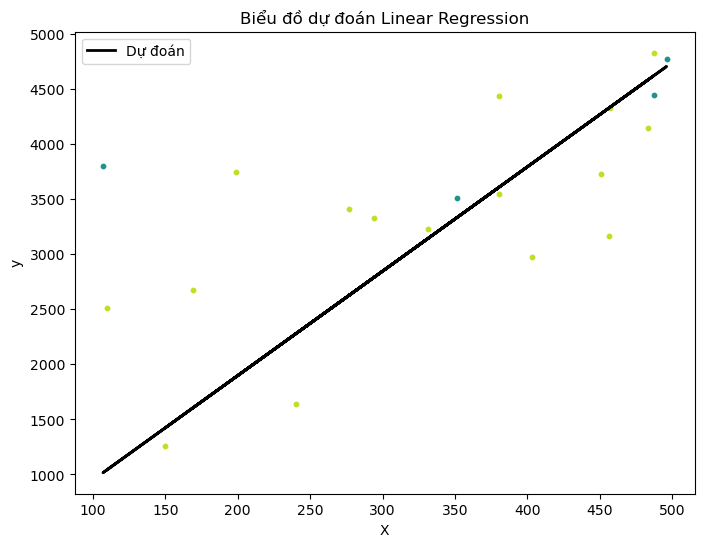

In [143]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Tạo dữ liệu mẫu
X = np.random.randint(100, 500, 20)
X = np.reshape(X, (20, 1))
y = np.random.randint(1000, 5000, 20)

def r2_score(y_true, y_pred):
    corr_matrix = np.corrcoef(y_true, y_pred)
    corr = corr_matrix[0, 1]
    return corr ** 2

class LinearRegression:
    def __init__(self, learning_rate=0.001, n_iters=1000):
        self.lr = learning_rate
        self.n_iters = n_iters
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        n_samples, n_features = X.shape

        # init parameters
        self.weights = np.zeros(n_features)
        self.bias = 0

        # gradient descent
        for _ in range(self.n_iters):
            y_predicted = np.dot(X, self.weights) + self.bias
            # compute gradients
            dw = (1 / n_samples) * np.dot(X.T, (y_predicted - y))
            db = (1 / n_samples) * np.sum(y_predicted - y)

            # update parameters
            self.weights -= self.lr * dw
            self.bias -= self.lr * db

            # Check for NaN or infinite values
            if np.isnan(self.weights).any() or np.isnan(self.bias) or not np.isfinite(self.weights).all() or not np.isfinite(self.bias):
                print("Giá trị NaN hoặc vô hạn được gặp phải. Điều chỉnh tỷ lệ học.")
                self.lr *= 0.1  # Giảm tỷ lệ học
                self.weights = np.zeros(n_features)
                self.bias = 0
                continue

    def predict(self, X):
        y_approximated = np.dot(X, self.weights) + self.bias
        return y_approximated

if __name__ == "__main__":
    # Chia dữ liệu thành tập huấn luyện và tập kiểm tra
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=1234
    )

    # Khởi tạo và huấn luyện mô hình
    regressor = LinearRegression(learning_rate=0.01, n_iters=1000)
    regressor.fit(X_train, y_train)

    # Dự đoán và tính toán độ chính xác
    predictions = regressor.predict(X_test)
    mse = mean_squared_error(y_test, predictions)
    accu = r2_score(y_test, predictions)
    print("MSE:", mse)
    print("Độ chính xác:", accu)

    # Vẽ biểu đồ minh họa
    y_pred_line = regressor.predict(X)
    cmap = plt.get_cmap("viridis")
    fig = plt.figure(figsize=(8, 6))
    m1 = plt.scatter(X_train, y_train, color=cmap(0.9), s=10)
    m2 = plt.scatter(X_test, y_test, color=cmap(0.5), s=10)
    plt.plot(X, y_pred_line, color="black", linewidth=2, label="Dự đoán")
    plt.xlabel('X')
    plt.ylabel('y')
    plt.title('Biểu đồ dự đoán Linear Regression')
    plt.legend()
    plt.show()


In [144]:
import numpy as np

class Perceptron(object):
    """Bộ phân loại Perceptron.

    Tham số
    ------------
    eta : float
      Tỷ lệ học (từ 0.0 đến 1.0)
    n_iter : int
      Số lần duyệt qua tập dữ liệu huấn luyện.
    random_state : int
      Seed của bộ tạo số ngẫu nhiên để khởi tạo trọng số ngẫu nhiên.

    Thuộc tính
    -----------
    w_ : mảng 1d
      Trọng số sau khi huấn luyện.
    errors_ : list
      Số lần phân loại sai (cập nhật) trong mỗi epoch.

    """
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    def fit(self, X, y):
        """Gắn dữ liệu huấn luyện.

        Tham số
        ----------
        X : {mảng-like}, hình dạng = [n_samples, n_features]
          Vector huấn luyện, trong đó n_samples là số lượng mẫu và
          n_features là số lượng đặc trưng.
        y : mảng-like, hình dạng = [n_samples]
          Giá trị mục tiêu.

        Returns
        -------
        self : object

        """
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
        self.errors_ = []

        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_[1:] += update * xi
                self.w_[0] += update
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self

    def net_input(self, X):
        """Tính toán đầu vào mạng"""
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def predict(self, X):
        """Trả về nhãn lớp sau bước đơn vị"""
        return np.where(self.net_input(X) >= 0.0, 1, -1)

# Tạo dữ liệu mẫu
X = np.array([[2, 2], [3, 4], [5, 6], [7, 8], [9, 10]])
y = np.array([-1, -1, 1, 1, 1])

# Huấn luyện mô hình Perceptron
perceptron = Perceptron(eta=0.1, n_iter=10)
perceptron.fit(X, y)

# In trọng số sau khi huấn luyện
print("Trọng số sau khi huấn luyện:", perceptron.w_)

# Dự đoán nhãn lớp cho các mẫu dữ liệu
print("Dự đoán nhãn lớp:", perceptron.predict(X))




Trọng số sau khi huấn luyện: [-1.58375655  0.99388244  1.19471828]
Dự đoán nhãn lớp: [1 1 1 1 1]


xong